In [66]:
# It is a object detection task like project.
# Requirements: Marine compnay needs to identify the type of boat entering their port.
# Model needs to be light weight and that needs to deploed in any mobile devices using transfer learning
# MobileNetV2 is a popular using keras API
# another model nededs to created manually using the given layer requirements
#comparing both results to find the better results





In [67]:
#file is in zipped format, needs to unzip it using zipfile module
import zipfile
zipped_file_location = r"C:\Users\iswar\Downloads\Dataset (3).zip"
location_extract_file = r"C:\Users\iswar\OneDrive\文档\ML Materials\Projects"
with zipfile.ZipFile(zipped_file_location, 'r') as ref:
    ref.extractall(location_extract_file)
print('unzipped successfully')

unzipped successfully


In [68]:
# first load the file and preprocess it with the requirement to normlaize the pixel values
import tensorflow as tf
from sklearn.model_selection import train_test_split

image_directory = r"C:\Users\iswar\OneDrive\Desktop\iswarya\boat_type_classification_dataset"
training_data = tf.keras.preprocessing.image_dataset_from_directory(
    image_directory,
    validation_split =0.2,
    subset ='training',
    seed = 123,
    image_size = (224,224),
    batch_size = 32,
    label_mode='categorical',
    
)

validation_data = tf.keras.preprocessing.image_dataset_from_directory(
    image_directory,
    validation_split=0.2,
    subset ='validation',
    seed = 123,
    image_size =(224,224),
    batch_size = 32,
    label_mode ='categorical',
)

test_data = validation_data.take(116)
validation_data = validation_data.skip(116)

print(f"test_data_size: {tf.data.experimental.cardinality(test_data).numpy}")
print(f"validation_data_size: {tf.data.experimental.cardinality(validation_data).numpy}")


class_names = training_data.class_names
print(f"Number of Classes in test: {len(class_names)}")
print(f"Class Names: {class_names}")


normalization_layers = tf.keras.layers.Rescaling(1./255)
normalized_dataset_training = training_data.map(lambda x ,y:((normalization_layers(x)),y))
for x, y in training_data.take(1):
    print(f"Before Mapping: {x}, {y.numpy()}")
for x , y in normalized_dataset_training.take(1):
    print(f"after Mapping: {x}, {y.numpy()}")

normalized_dataset_test = test_data.map(lambda x ,y:((normalization_layers(x)),y))
normalized_dataset_validation = validation_data.map(lambda x, y: ((normalization_layers(x)),y))



Found 1162 files belonging to 9 classes.
Using 930 files for training.
Found 1162 files belonging to 9 classes.
Using 232 files for validation.
test_data_size: <bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=int64, numpy=8>>
validation_data_size: <bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=int64, numpy=0>>
Number of Classes in test: 9
Class Names: ['buoy', 'cruise_ship', 'ferry_boat', 'freight_boat', 'gondola', 'inflatable_boat', 'kayak', 'paper_boat', 'sailboat']
Before Mapping: [[[[  0.          57.          97.        ]
   [  0.          57.          97.        ]
   [  0.          57.          97.        ]
   ...
   [  0.          68.         110.        ]
   [  0.          68.         110.        ]
   [  0.          68.         110.        ]]

  [[  0.          57.          97.        ]
   [  0.          57.          97.        ]
   [  0.          57.          97.        ]
   ...
   [  0.          68.         110.        ]
   [  0.       

In [69]:
normalized_dataset_training = normalized_dataset_training.prefetch(tf.data.AUTOTUNE)
normalized_dataset_test= normalized_dataset_test.prefetch(tf.data.AUTOTUNE)
normalized_dataset_validation = normalized_dataset_validation.prefetch(tf.data.AUTOTUNE)

In [70]:
#model creation with convolutional 2D layers and maxpooling2D layers. last dense layer needs to be with the number of classes in the directory
model = tf.keras.Sequential([
    tf.keras.Input(shape=(224,224,3)),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Lambda(lambda x: print(f"Shape before GlobalAveragePooling2D: {x.shape}") or x),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Lambda(lambda x: print(f"Shape after GlobalAveragePooling2D: {x.shape}") or x),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Lambda(lambda x: print(f"Shape after dense: {x.shape}") or x),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Lambda(lambda x: print(f"Shape after dense 128: {x.shape}") or x),
    tf.keras.layers.Dense(len(class_names), activation='softmax'),
    tf.keras.layers.Lambda(lambda x: print(f"Shape after dense 9: {x.shape}") or x)
])
    

Shape before GlobalAveragePooling2D: (None, 54, 54, 32)
Shape after GlobalAveragePooling2D: (None, 32)
Shape after dense: (None, 128)
Shape after dense 128: (None, 128)
Shape after dense 9: (None, 9)


In [71]:
#model compilation
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

              

In [72]:
model_implement = model.fit(normalized_dataset_training,
                            validation_data = normalized_dataset_validation,
                            epochs=20)

Epoch 1/20
Shape before GlobalAveragePooling2D: (None, 54, 54, 32)
Shape after GlobalAveragePooling2D: (None, 32)
Shape after dense: (None, 128)
Shape after dense 128: (None, 128)
Shape after dense 9: (None, 9)
Shape before GlobalAveragePooling2D: (None, 54, 54, 32)
Shape after GlobalAveragePooling2D: (None, 32)
Shape after dense: (None, 128)
Shape after dense 128: (None, 128)
Shape after dense 9: (None, 9)
29/30 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step - accuracy: 0.2989 - loss: 2.0074 - precision_4: 0.3220 - recall_4: 0.0189Shape before GlobalAveragePooling2D: (None, 54, 54, 32)
Shape after GlobalAveragePooling2D: (None, 32)
Shape after dense: (None, 128)
Shape after dense 128: (None, 128)
Shape after dense 9: (None, 9)
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 480ms/step - accuracy: 0.3012 - loss: 1.9996 - precision_4: 0.3355 - recall_4: 0.0200
Epoch 2/20


C:\Users\iswar\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


30/30 ━━━━━━━━━━━━━━━━━━━━ 13s 408ms/step - accuracy: 0.3256 - loss: 1.8251 - precision_4: 0.3988 - recall_4: 0.0059
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 13s 405ms/step - accuracy: 0.3205 - loss: 1.8032 - precision_4: 0.2882 - recall_4: 0.0020
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 12s 402ms/step - accuracy: 0.3271 - loss: 1.7883 - precision_4: 0.7212 - recall_4: 0.0384
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 13s 407ms/step - accuracy: 0.3370 - loss: 1.7633 - precision_4: 0.6493 - recall_4: 0.0396
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 13s 406ms/step - accuracy: 0.3422 - loss: 1.7187 - precision_4: 0.5711 - recall_4: 0.0456
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 12s 402ms/step - accuracy: 0.3446 - loss: 1.7669 - precision_4: 0.4374 - recall_4: 0.0970
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 13s 406ms/step - accuracy: 0.3935 - loss: 1.6712 - precision_4: 0.5616 - recall_4: 0.1106
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 13s 410ms/step - accuracy: 0.3756 - loss: 1.6997 - precision_4: 0.5634 - reca

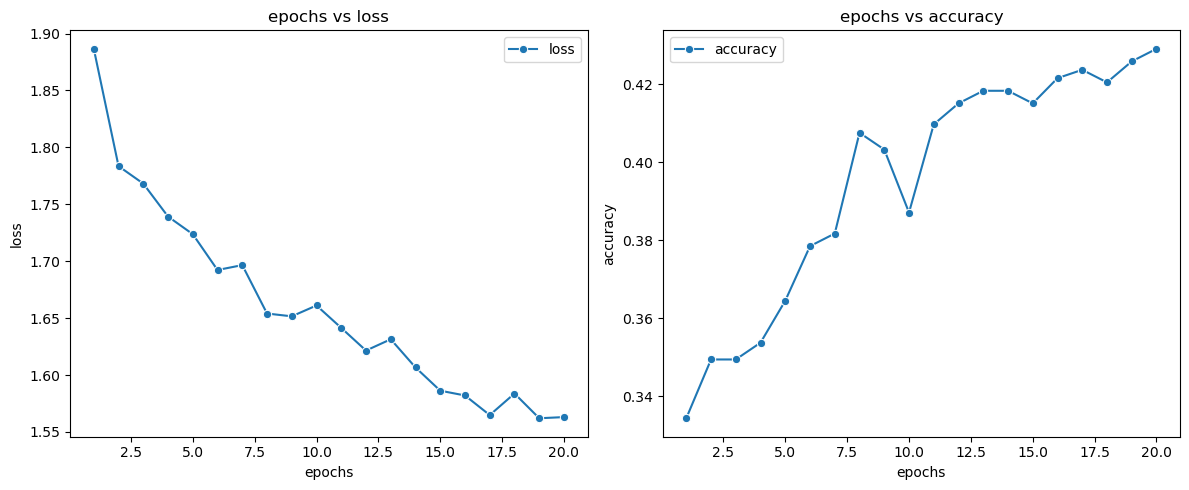

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
epochs = range(1, len(model_implement.history['loss'])+1)
loss = model_implement.history['loss']
accuracy = model_implement.history['accuracy']

plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
sns.lineplot(x= epochs, y =loss, marker='o', label='loss')
plt.title("epochs vs loss")
plt.xlabel("epochs")
plt.ylabel("loss")


plt.subplot(1,2,2)
sns.lineplot(x= epochs, y =accuracy, marker='o', label='accuracy')
plt.title("epochs vs accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.tight_layout()
plt.show()



In [74]:
test_evaluation = model.evaluate(normalized_dataset_test)
print(f"test_loss: {test_evaluation[0]}, test_accuracy: {test_evaluation[1]}")


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - accuracy: 0.3505 - loss: 1.8016 - precision_4: 0.3879 - recall_4: 0.2073
test_loss: 1.7433775663375854, test_accuracy: 0.3534482717514038


In [75]:
# plotting confusion matrix and classification report
# confusion matrix is a matrix between label predicted and actual labels in test data set. 
# we can access this using confusion matrix method from the module sklearn.metrcs. 
# similarly classification report is alos available with sklearn.

from sklearn.metrics import classification_report, confusion_matrix

#now we need to find the y_predicted value for plotting
y_pred_probs = model.predict(normalized_dataset_test) #op will be a probability value
y_pred_probs[2]


Shape before GlobalAveragePooling2D: (32, 54, 54, 32)
Shape after GlobalAveragePooling2D: (32, 32)
Shape after dense: (32, 128)
Shape after dense 128: (32, 128)
Shape after dense 9: (32, 9)
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/stepShape before GlobalAveragePooling2D: (None, 54, 54, 32)
Shape after GlobalAveragePooling2D: (None, 32)
Shape after dense: (None, 128)
Shape after dense 128: (None, 128)
Shape after dense 9: (None, 9)
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step


array([0.04913826, 0.19546047, 0.06495123, 0.01568378, 0.01405879,
       0.00814567, 0.11439142, 0.0291267 , 0.50904375], dtype=float32)

In [76]:
import numpy as np
y_pred = np.argmax(y_pred_probs, axis=1) # defining axis=1 is for doing argmax operation in row wise data
y_pred


array([8, 4, 8, 6, 8, 8, 6, 4, 8, 4, 8, 8, 8, 8, 4, 8, 8, 8, 4, 8, 4, 8,
       4, 8, 8, 8, 8, 8, 8, 8, 8, 6, 8, 8, 6, 6, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 4, 8, 8, 8, 8, 8, 4, 8, 4, 6, 8, 8, 8, 6, 8, 8, 6, 8, 8,
       8, 8, 8, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 6, 8, 8, 8, 8, 8, 8,
       4, 6, 8, 8, 8, 8, 8, 4, 8, 8, 4, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 4, 8, 8, 8, 8, 8, 8, 8, 8, 8, 4, 8, 4, 8,
       4, 8, 8, 4, 6, 8, 8, 8, 8, 8, 4, 8, 8, 8, 8, 4, 8, 8, 8, 4, 4, 4,
       8, 8, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 4, 8, 8, 8, 8, 8, 6, 8,
       8, 8, 4, 8, 6, 4, 4, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 6, 8, 4, 8, 8, 8, 8, 8, 8, 8, 8, 4, 8, 6, 4, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 4, 6, 4, 8, 8, 8, 8, 8], dtype=int64)

In [77]:
y_true_prob = np.concatenate([y.numpy() for x, y in normalized_dataset_test])
y_true_prob[2]

array([0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [78]:
y_true = np.argmax(y_true_prob, axis=1)
y_true

array([6, 6, 8, 6, 4, 1, 1, 7, 4, 0, 8, 1, 8, 6, 6, 4, 6, 8, 4, 1, 6, 1,
       6, 1, 4, 8, 2, 1, 8, 8, 4, 2, 2, 4, 8, 8, 8, 5, 8, 6, 7, 8, 8, 6,
       8, 8, 8, 4, 7, 1, 4, 2, 8, 1, 1, 6, 1, 2, 4, 2, 8, 4, 1, 3, 8, 6,
       4, 4, 8, 8, 6, 8, 8, 8, 4, 6, 4, 2, 8, 8, 4, 8, 1, 6, 8, 3, 4, 8,
       8, 8, 8, 4, 8, 5, 8, 8, 8, 0, 8, 8, 1, 4, 3, 6, 1, 2, 1, 0, 4, 6,
       8, 3, 8, 6, 2, 6, 8, 0, 1, 4, 4, 1, 2, 4, 4, 8, 2, 8, 0, 4, 0, 7,
       6, 6, 5, 1, 1, 4, 8, 6, 1, 6, 1, 4, 0, 4, 1, 6, 0, 3, 4, 7, 7, 8,
       6, 8, 6, 1, 8, 6, 4, 1, 4, 8, 1, 1, 1, 8, 6, 4, 8, 6, 4, 8, 1, 6,
       7, 1, 6, 4, 7, 8, 4, 4, 4, 6, 8, 8, 1, 3, 6, 8, 6, 4, 4, 0, 4, 2,
       4, 0, 1, 8, 6, 6, 4, 4, 8, 6, 0, 4, 8, 8, 8, 1, 7, 1, 8, 4, 6, 6,
       7, 1, 0, 6, 2, 1, 8, 8, 6, 8, 4, 4], dtype=int64)

In [53]:
y_in = [y.numpy() for x,y in normalized_dataset_test]
print(y)

[array([[0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0

In [54]:
y_true_prob = np.concatenate([y.numpy() for x, y in normalized_dataset_test])
y_true_prob

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

[[ 0  0  0  0  3  0  1  0  8]
 [ 0  0  0  0  5  0  5  0 26]
 [ 0  0  0  0  1  0  1  0 11]
 [ 0  0  0  0  0  0  1  0  5]
 [ 0  0  0  0  3  0  0  0 44]
 [ 0  0  0  0  0  0  0  0  3]
 [ 0  0  0  0  9  0  2  0 30]
 [ 0  0  0  0  3  0  1  0  6]
 [ 0  0  0  0  8  0  7  0 49]]


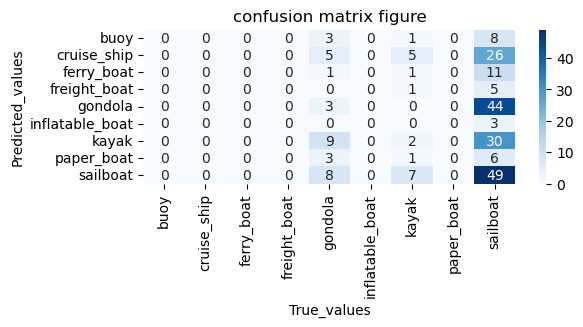

In [80]:
import seaborn as sns
conf_matrix = confusion_matrix(y_true, y_pred)
print(conf_matrix)

plt.figure(figsize=(6,2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',xticklabels=class_names, yticklabels=class_names)
plt.xlabel('True_values')
plt.ylabel('Predicted_values')
plt.title('confusion matrix figure')
plt.show()

In [81]:
class_report = classification_report(y_true, y_pred)
print(f'classification_report: {class_report}')

classification_report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.00      0.00      0.00        36
           2       0.00      0.00      0.00        13
           3       0.00      0.00      0.00         6
           4       0.09      0.06      0.08        47
           5       0.00      0.00      0.00         3
           6       0.11      0.05      0.07        41
           7       0.00      0.00      0.00        10
           8       0.27      0.77      0.40        64

    accuracy                           0.23       232
   macro avg       0.05      0.10      0.06       232
weighted avg       0.11      0.23      0.14       232



C:\Users\iswar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\iswar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\iswar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [137]:
#performance is very poor with the above model
#ways to improve performance - adding one more convolutional layer, or fearure engineering with pretrained model/architecture, data_augmentation, 
# trying a technique called transfer learning in this project with a lightweight front layer

training_data_mobile = tf.keras.preprocessing.image_dataset_from_directory(
    image_directory,
    validation_split=0.3,
    subset= 'training',
    seed= 123,
    image_size = (224,224),
    label_mode='categorical',
    batch_size = 32
)
validation_data_mobile = tf.keras.preprocessing.image_dataset_from_directory(
    image_directory,
    validation_split=0.3,
    subset = 'validation',
    seed = 123,
    image_size = (224,224),
    label_mode='categorical',
    batch_size = 32)

test_data_mobile = validation_data_mobile.take(175)
validation_data_mobile = validation_data_mobile.skip(175)

for x, y in validation_data_mobile.take(1):
    print(x.shape)
    print(y.shape)

for x, y in test_data_mobile.take(1):
    print(f"test_data shape {x.shape}")
    print(f"test_data: {y.shape}")
    
class_names_mobile = len(class_names)
    

Found 1162 files belonging to 9 classes.
Using 814 files for training.
Found 1162 files belonging to 9 classes.
Using 348 files for validation.
test_data shape (32, 224, 224, 3)
test_data: (32, 9)


In [85]:
print(class_names_mobile)


9


In [134]:
# normalizing the image pixels in the range of 0 to 1
normalizing_layers = tf.keras.layers.Rescaling(1./255)
training_normalization = training_data_mobile.map(lambda x, y : ((normalizing_layers(x)),y))
validation_normalization = validation_data_mobile.map(lambda x, y : ((normalizing_layers(x)),y))
print(len(validation_normalization))
test_normalization = test_data_mobile.map(lambda x, y : ((normalizing_layers(x)),y))

training_normalization = training_normalization.prefetch(tf.data.AUTOTUNE)
validation_normalization = validation_normalization.prefetch(tf.data.AUTOTUNE)
test_normalization = test_normalization.prefetch(tf.data.AUTOTUNE)


0


In [107]:
front_layer = tf.keras.applications.MobileNetV2(
    input_shape =(224,224,3),
    include_top = False,
    weights = 'imagenet'
)

In [108]:
front_layer.trainable = False


In [109]:
model = tf.keras.Sequential([
    front_layer,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation ='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(128, activation ='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(9, activation ='softmax')
])

In [110]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy', tf.keras.metrics.Precision(),  tf.keras.metrics.Recall()])

In [116]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor = 'val_loss',
    mode = 'min',
    patience = 5,
    restore_best_weights = True)

In [117]:
model_application = model.fit(training_normalization,
          validation_data = validation_normalization,
          epochs = 50,
          callbacks = [early_stopping]
                             )

Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 15s 543ms/step - accuracy: 0.9914 - loss: 0.0502 - precision_6: 0.9962 - recall_6: 0.9914
Epoch 2/50


C:\Users\iswar\anaconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `Val_loss` which is not available. Available metrics are: accuracy,loss,precision_6,recall_6
  current = self.get_monitor_value(logs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 14s 542ms/step - accuracy: 0.9892 - loss: 0.0535 - precision_6: 0.9899 - recall_6: 0.9839
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 14s 536ms/step - accuracy: 0.9910 - loss: 0.0419 - precision_6: 0.9946 - recall_6: 0.9893
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 16s 589ms/step - accuracy: 0.9950 - loss: 0.0359 - precision_6: 0.9950 - recall_6: 0.9927
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 16s 586ms/step - accuracy: 0.9952 - loss: 0.0293 - precision_6: 0.9999 - recall_6: 0.9938
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 15s 544ms/step - accuracy: 0.9927 - loss: 0.0304 - precision_6: 0.9927 - recall_6: 0.9927
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 15s 560ms/step - accuracy: 0.9891 - loss: 0.0424 - precision_6: 0.9891 - recall_6: 0.9858
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 15s 546ms/step - accuracy: 0.9894 - loss: 0.0403 - precision_6: 0.9917 - recall_6: 0.9877
Epoch 9/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 15s 545ms/step - accuracy: 0.9977 - loss: 0.0265 - precision_6: 0.9977 - reca

In [119]:
test_results = model.evaluate(test_normalization)

11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 510ms/step - accuracy: 0.8423 - loss: 0.7863 - precision_6: 0.8651 - recall_6: 0.8423


In [123]:
print(f"accuarcy of the model in test_data : {test_results[1]}")
print(f"loss of the model in test_data : {test_results[0]}")

accuarcy of the model in test_data : 0.8419540524482727
loss of the model in test_data : 0.7733352780342102


In [129]:
print(model_application.history.keys())

dict_keys(['accuracy', 'loss', 'precision_6', 'recall_6'])


In [138]:
# Results using transfer learning is performing weell when compared to both the models. it is always better to use the pretrained model in building a new dataset

In [139]:
True and False


False

In [140]:
5 ![SB1] [GK2] = 3


SyntaxError: invalid syntax (1734083745.py, line 1)